<a href="https://colab.research.google.com/github/KimYongHwi/dacon/blob/main/dacon_school/3%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASELINE CODE 실습

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
%matplotlib inline

matplotlib.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='NanumGothic') 

In [ ]:
# 폰트 다운 받기
!apt-get update -qq
!apt -qq -y install fonts-nanum
 
# 폰트 설정하기 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=path, size=10)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 72 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


## Library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

from google.colab import drive
drive.mount('content/', force_remount=True)

Mounted at content/


## Loading data

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

def load_data():
    %cd '/content/content/MyDrive/Dacon school'

    data_path = './data/'

    train = pd.read_csv(data_path + 'train.csv')
    test = pd.read_csv(data_path + 'test_x.csv')
    submission = pd.read_csv(data_path+'sample_submission.csv', index_col = 0)

    return train, test, submission

In [7]:
train, test, submission = load_data()
train_y = train['voted']

/content/content/MyDrive/Dacon school


In [ ]:
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


## 변수 제거

In [ ]:
drop_val = ['QaA', 'QbA', 'QbE', 'QcA', 'QcE', 'QdE', 'QeA','QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'wf_01', 'wf_02', 'wf_03']

train = train.drop(drop_val, axis = 1)
test = test.drop(drop_val, axis = 1)
eda_df = train.copy()

display(train.head())
display(test.head())

,index,QaE,QdA,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,363,1.0,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,647,5.0,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,1623,4.0,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,504,3.0,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,927,2.0,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1


,index,QaE,QdA,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,736,1.0,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,1,0,0,1,0,0,1,0,1,0,1,1
1,1,514,3.0,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,500,2.0,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,1,0,0,1,0,1,1,0,1,0,1,1
3,3,669,2.0,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,1,1,1,1,1,1,1,1,1,1,1,1,1
4,4,499,2.0,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,1,1,0,1,1,0,1,1,0,1,1,1,1


## Q1 ) 데이터 사전 처리
- Missing Data가 있는지 확인하시고, Missing Data가 있다면 처리하세요

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaE         45532 non-null  int64  
 2   QdA         45532 non-null  float64
 3   age_group   45532 non-null  object 
 4   education   45532 non-null  int64  
 5   engnat      45532 non-null  int64  
 6   familysize  45532 non-null  int64  
 7   gender      45532 non-null  object 
 8   hand        45532 non-null  int64  
 9   married     45532 non-null  int64  
 10  race        45532 non-null  object 
 11  religion    45532 non-null  object 
 12  tp01        45532 non-null  int64  
 13  tp02        45532 non-null  int64  
 14  tp03        45532 non-null  int64  
 15  tp04        45532 non-null  int64  
 16  tp05        45532 non-null  int64  
 17  tp06        45532 non-null  int64  
 18  tp07        45532 non-null  int64  
 19  tp08        45532 non-nul

## Q2) 인코딩
- String 형태의 Data를 가진 Feature에 대해 Label Encoding을 진행하고, 원본 Feature는 제거하세요

In [9]:
string_columns = list(train.columns[train.dtypes == 'object'])
string_columns

['age_group', 'gender', 'race', 'religion']

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

def label_encoding(train, test, string_columns):
    for column in string_columns:
        new_feature = 'label_' + column
        train[new_feature] = encoder.fit_transform(train[column])
        test[new_feature] = encoder.transform(test[column])
    
    train = train.drop(string_columns, axis = 1)
    test = test.drop(string_columns, axis = 1)

    return train, test

train, test = label_encoding(train, test, string_columns)

In [ ]:
train

,index,QaE,QdA,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,label_age_group,label_gender,label_race,label_religion
0,0,363,1.0,2,1,4,1,3,2,2,2,1,2,1,7,4,4,3,1,2,0,1,0,0,1,0,1,1,0,1,0,1,1,3,0,6,10
1,1,647,5.0,4,2,3,1,1,1,1,0,0,1,2,3,4,0,4,3,2,0,1,0,1,1,0,1,1,0,1,0,1,1,2,0,1,7
2,2,1623,4.0,3,1,3,1,2,2,3,1,5,3,4,2,6,1,3,2,1,1,1,0,1,1,0,1,1,1,1,0,1,1,3,1,6,10
3,3,504,3.0,4,2,0,1,1,2,4,1,1,1,3,1,3,1,3,3,1,0,1,0,0,0,0,0,1,0,1,0,1,1,2,0,1,7
4,4,927,2.0,3,1,2,1,2,1,1,1,6,0,2,0,6,2,6,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,2,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,1050,1.0,2,1,1,3,1,1,2,6,1,2,6,3,0,6,4,3,2,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,6,8
45528,45528,581,1.0,2,1,2,1,1,2,2,2,3,1,3,3,4,1,5,1,2,1,1,1,1,1,0,1,1,1,1,0,1,1,3,1,6,1
45529,45529,593,4.0,2,1,1,1,1,4,4,2,4,0,1,0,2,1,6,2,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0,6,5
45530,45530,747,2.0,4,1,2,3,1,1,2,0,4,0,1,3,2,2,4,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,4,1,6,1


In [ ]:
test

,index,QaE,QdA,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,label_age_group,label_gender,label_race,label_religion
0,0,736,1.0,2,2,3,1,1,2,1,1,4,1,2,2,3,4,4,2,0,1,0,0,1,0,0,1,0,1,0,1,1,1,1,6,6
1,1,514,3.0,2,2,2,2,1,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,3
2,2,500,2.0,3,2,7,1,2,6,2,3,0,6,1,2,2,4,1,1,0,1,0,0,1,0,1,1,0,1,0,1,1,3,1,5,5
3,3,669,2.0,4,1,4,1,2,0,5,1,6,0,6,0,5,1,6,2,1,1,1,1,1,1,1,1,1,1,1,1,1,6,1,6,3
4,4,499,2.0,2,1,3,1,1,6,1,2,2,3,0,5,2,4,3,2,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,427,1.0,3,2,3,1,1,1,0,0,3,0,4,1,0,4,5,0,1,1,0,1,1,0,1,1,0,1,0,1,1,2,0,5,3
11379,11379,314,1.0,2,2,1,1,1,2,0,2,0,0,6,0,0,6,4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
11380,11380,627,2.0,4,1,4,1,2,4,2,1,6,1,2,1,6,0,5,1,1,1,1,1,1,0,1,1,0,1,0,1,1,3,1,6,1
11381,11381,539,1.0,2,1,3,1,2,4,6,1,6,0,2,1,6,1,5,2,1,1,0,1,0,0,1,1,0,1,1,1,0,4,0,6,1


## Q3 ) 시각화 (Matplotlib, Seaborn을 이용)
- 데이터의 분포를 시각화해보세요
- 자신만의 가설 3가지를 세우고 검증하세요

## 가설 1. 학력이 높을 수록 투표율이 높을 것이다.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51025 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45813 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51025 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend

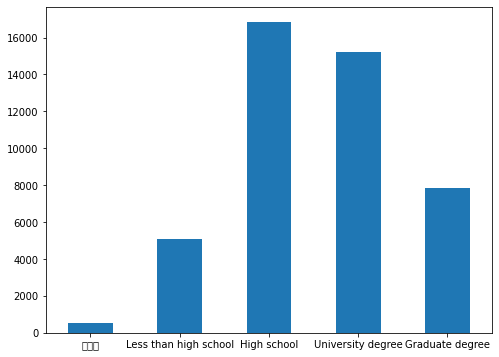

In [ ]:
x_labels = ['무응답', 'Less than high school', 'High school', 'University degree', 'Graduate degree']
ax = eda_df['education'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

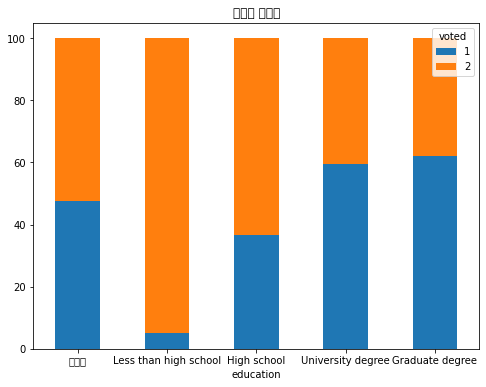

In [ ]:
ax = eda_df.groupby('education')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('학력별 투표율')
plt.show()

## 가설 2. 실존하는 해당 단어의 정의을 많이 알수록 투표율이 높을 것이다 

In [16]:
# wr_(01~13) : 실존하는 해당 단어의 정의을 앎

def set_know_count(df):
    df['know_count'] = df.filter(regex = 'wr*').sum(axis = 1)
    return df

In [ ]:
eda_df = set_know_count(eda_df)
test = set_know_count(test)

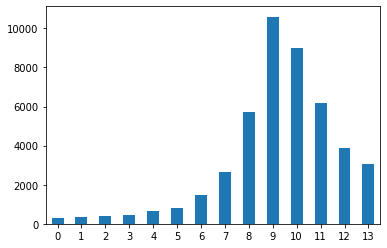

In [ ]:
eda_df['know_count'].value_counts().sort_index().plot(kind = 'bar', rot = 0)

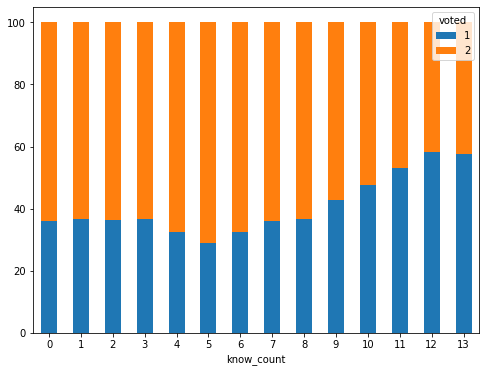

In [ ]:
ax = eda_df.groupby('know_count')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
plt.show()

## 가설 3. 기혼이 투표율이 높을것이다.

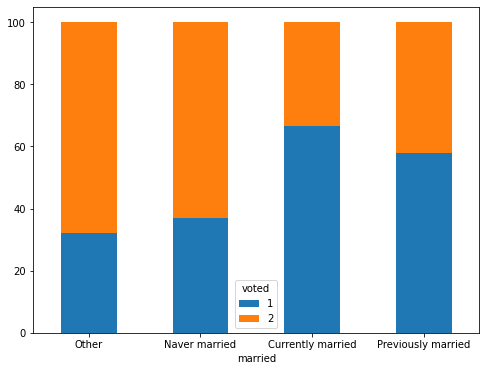

In [ ]:
x_labels = ['Other', 'Naver married', 'Currently married', 'Previously married']
ax = eda_df.groupby('married')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

## Q4) 학습시킬 데이터를 만들어 LGBMClassifier 모델을 만들고, 학습시켜 결과를 예측해보세요

In [ ]:
train = train.assign(know_count = eda_df['know_count'])

In [ ]:
wr_columns = [column for column in train.columns if column.startswith("wr")]
train = train.drop(columns = wr_columns, axis = 1)
test = test.drop(columns = wr_columns, axis = 1)

In [ ]:
train = train.drop(columns=['voted'], axis = 1)

In [ ]:
model = LGBMClassifier()
model.fit(train, train_y)
prediction = model.predict(test)

## Q5) 결과를 파일로 만들어 저장하고, DACON 사이트에 제출하세요

In [ ]:
submission['voted'] = prediction
submission.to_csv('./심리성향 3주차 수업/submission.csv')

## Q6 - 선택적 과제 ) 데이터를 다시 로드하고, 3주차 수업 내용을 적용해 성능을 높여보세요
### 그리고 그 내용을 바탕으로 5월 24일에 진행할 15 ~ 20분 사이의 발표를 준비해보세요
- 3주차 수업 내용
  - 다양한 Encoder 적용 : Label Encoding, OneHot Encoding, Mean Encoding
  - Cross Validation 적용 : Train_test_split, KFCV, Stratified KFCV
  - Hyperparameter Optimization 적용 : Grid Search, Random Search, Bayesian Optimization

- 알아볼만한 내용
  - 피쳐를 최대한 활용해보세요. (BaseLine에서는 QdE, QdA만 활용했었음)
  - 새로운 피쳐들을 만들어 보세요.
  - 이상치가 있는 데이터를 어떻게 활용하면 좋을지 생각해보세요
  - Scaler를 이용해서 변환해보세요
  - 데이터의 분포를 보고 Log 변환을 적용해보세요
  - 단일 모델 이외의 다른 모델도 학습시켜 앙상블해보세요



In [ ]:
train, test, submission = load_data()

/content/content/MyDrive/Dacon school


In [11]:
def init_data(train, test):
    drop_val = ['QaA', 'QbA', 'QbE', 'QcA', 'QcE', 'QdE', 'QeA','QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'wf_01', 'wf_02', 'wf_03']

    train_ = train.drop(drop_val, axis = 1)
    test_ = test.drop(drop_val, axis = 1)

    train_ = set_know_count(train_)
    test_ = set_know_count(test_)

    train_y = train_['voted']
    train_ = train_.drop(['voted'], axis = 1)

    train_ = train_.drop(train_.filter(regex = 'wr_*').columns.tolist(), axis = 1)
    test_ = test_.drop(test_.filter(regex = 'wr_*').columns.tolist(), axis = 1)

    return train_, train_y, test_

## Hyperparameter Optimization

### 기본 점수

In [27]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = {}

In [ ]:
train, test, submission = load_data()
train, test = label_encoding(train, test, string_columns)

/content/content/MyDrive/Dacon school


In [ ]:
train, train_y, test = init_data(train, test)

In [ ]:
model = LGBMClassifier()
model.fit(train, train_y)
normal_score = cross_val_score(model, train, train_y, cv = 3, scoring= 'roc_auc')
print('기본 점수 : ', np.mean(normal_score))

기본 점수 :  0.7619959487431558


In [ ]:
scores['noraml_score'] = np.mean(normal_score)

### 1. Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

In [12]:
def get_grid_model(cv, X, y):
    model = LGBMClassifier()

    grid_search = GridSearchCV(model, param_grid = param_grid, scoring = 'roc_auc', n_jobs = -1, cv = cv)
    grid_search.fit(X, y)

    grid_hyperparams = grid_search.best_params_
    print(grid_hyperparams)

    return LGBMClassifier(**grid_hyperparams)

In [ ]:
grid_model = get_grid_model(3, train, train_y)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [ ]:
grid_model.fit(train, train_y)
grid_search_score = cross_val_score(grid_model, train, train_y, cv = 3, scoring = 'roc_auc')
print("Grid search 후 점수:", np.mean(grid_search_score))

Grid search 후 점수: 0.7662430812265733


In [ ]:
scores['grid_search_score'] = np.mean(grid_search_score)

### 2. Random search

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
param_random = {
    'n_estimators': range(300, 501),
    'learning_rate': np.arange(0.01, 0.1, 0.001),
    'max_depth': range(3, 10)
}

In [13]:
def get_random_model(cv, X, y):
    model = LGBMClassifier()
    random_search = RandomizedSearchCV(model, param_random, scoring = 'roc_auc', n_jobs = -1, cv = cv)
    random_search.fit(X, y)

    random_hyperparams = random_search.best_params_
    print(random_hyperparams)

    return LGBMClassifier(**random_hyperparams)

In [ ]:
random_model = get_random_model(3, train, train_y)

{'n_estimators': 384, 'max_depth': 9, 'learning_rate': 0.014999999999999996}


In [ ]:
random_model.fit(train, train_y)
random_search_score = cross_val_score(random_model, train, train_y, cv = 3, scoring='roc_auc')
print('RANDOM SEARCH 후 점수 : ', np.mean(random_search_score))

RANDOM SEARCH 후 점수 :  0.7664489599172506


In [ ]:
scores['random_search_score'] = np.mean(random_search_score)

## Cross validation

In [20]:
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

### 1. Holdout

In [ ]:
train, test, submission = load_data()
train, train_y, test = init_data(train, test)
train_x, valid_x, train_y, valid_y = train_test_split(train, train_y, test_size=0.3)

/content/content/MyDrive/Dacon school


In [ ]:
train_x, valid_x = label_encoding(train_x, valid_x, string_columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
model = LGBMClassifier()
model.fit(train_x, train_y)
prediction = model.predict(valid_x)
holdout_score = roc_auc_score(valid_y, prediction)
print(holdout_score)

0.7053787548661354


In [ ]:
scores['holdout_score'] = holdout_score

### 2. KFCV

In [ ]:
train, test, submission = load_data()
train, test = label_encoding(train, test, string_columns)

/content/content/MyDrive/Dacon school


In [ ]:
train, train_y, test = init_data(train, test)

#### KFCV - Normal

In [ ]:
kfold = KFold(n_splits=4, shuffle=True)

model = LGBMClassifier()
model.fit(train, train_y)
kfold_normal_score = cross_val_score(model, train, train_y, cv = kfold, scoring= 'roc_auc')
print('기본 점수 : ', np.mean(kfold_normal_score))

기본 점수 :  0.7654603641696518


In [ ]:
pred = model.predict(test)
submission['voted'] = pred
submission.to_csv('./심리성향 3주차 수업/kfcv_normal_submission.csv')

In [ ]:
scores['kfold_noraml_score'] = np.mean(kfold_normal_score)

#### KFCV - Grid search

In [ ]:
grid_model = get_grid_model(kfold, train, train_y)

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}


In [ ]:
grid_model.fit(train, train_y)
kfold_grid_score = cross_val_score(grid_model, train, train_y, cv = kfold, scoring = 'roc_auc')
print("Grid search 후 점수:", np.mean(kfold_grid_score))

Grid search 후 점수: 0.7673509807345695


In [ ]:
pred = grid_model.predict(test)
submission['voted'] = pred
submission.to_csv('./심리성향 3주차 수업/kfcv_grid_search_submission.csv')

In [ ]:
scores['kfold_grid_search_score'] = np.mean(kfold_grid_score)

### KFCV - Random search

In [ ]:
random_model = get_random_model(kfold, train, train_y)

{'n_estimators': 490, 'max_depth': 4, 'learning_rate': 0.04699999999999997}


In [ ]:
random_model.fit(train, train_y)
kfold_random_score = cross_val_score(random_model, train, train_y, cv = kfold, scoring='roc_auc')
print('RANDOM SEARCH 후 점수 : ', np.mean(kfold_random_score))

RANDOM SEARCH 후 점수 :  0.7655841408287802


In [ ]:
pred = random_model.predict(test)
submission['voted'] = pred
submission.to_csv('./심리성향 3주차 수업/kfcv_random_search_submission.csv')

In [ ]:
scores['kfold_random_search_score'] = np.mean(kfold_random_score)

### 2. Stratified KFCV

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
train, test, submission = load_data()
train, test = label_encoding(train, test, string_columns)

/content/content/MyDrive/Dacon school


In [ ]:
train, train_y, test = init_data(train, test)

#### Stratified KFCV - Normal

In [ ]:
skfold = StratifiedKFold(n_splits = 4, shuffle = True)

In [ ]:
model = LGBMClassifier()
model.fit(train, train_y)
skfold_normal_score = cross_val_score(model, train, train_y, cv = skfold, scoring= 'roc_auc')
print('기본 점수 : ', np.mean(skfold_normal_score))

기본 점수 :  0.7655090276223184


In [ ]:
pred = model.predict(test)
submission['voted'] = pred
submission.to_csv('./심리성향 3주차 수업/skfold_normal_submission.csv')

In [ ]:
scores['skfold_normal_score'] = np.mean(skfold_normal_score)

#### Stratified KFCV - Grid search

In [ ]:
grid_model = get_grid_model(skfold, train, train_y)

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}


In [ ]:
grid_model.fit(train, train_y)
grid_skfold_score = cross_val_score(grid_model, train, train_y, cv = skfold, scoring = 'roc_auc')
print("Grid search 후 점수:", np.mean(grid_skfold_score))

Grid search 후 점수: 0.7681855655421204


In [ ]:
pred = grid_model.predict(test)
submission['voted'] = pred
submission.to_csv('./심리성향 3주차 수업/skfold_grid_search_submission.csv')

In [ ]:
scores['skfold_grid_search_score'] = np.mean(grid_skfold_score)

#### Stratified - Random search

In [ ]:
random_model = get_random_model(skfold, train, train_y)

{'n_estimators': 356, 'max_depth': 9, 'learning_rate': 0.023999999999999987}


In [ ]:
random_model.fit(train, train_y)
skfold_random_score = cross_val_score(random_model, train, train_y, cv = skfold, scoring='roc_auc')
print('RANDOM SEARCH 후 점수 : ', np.mean(skfold_random_score))

RANDOM SEARCH 후 점수 :  0.7667319525050217


In [ ]:
pred = random_model.predict(test)
submission['voted'] = pred
submission.to_csv('./심리성향 3주차 수업/skfold_random_search_submission.csv')

In [ ]:
scores['skfold_random_search_score'] = np.mean(skfold_random_score)

In [ ]:
print(scores)

{'noraml_score': 0.7619959487431558, 'grid_search_score': 0.7662430812265733, 'random_search_score': 0.7664489599172506, 'holdout_score': 0.7053787548661354, 'kfold_noraml_score': 0.7654603641696518, 'kfold_grid_search_score': 0.7673509807345695, 'kfold_random_search_score': 0.7655841408287802, 'skfold_normal_score': 0.7655090276223184, 'skfold_grid_search_score': 0.7681855655421204, 'skfold_random_search_score': 0.7667319525050217}


In [ ]:
max(scores, key=scores.get)

'skfold_grid_search_score'

## Scaling

- 데이터의 값이 너무 크거나 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해 버릴 수 있는 것을 방지하거나, 예측 값이 범위를 벗어나는 입력데이터의 값에 더 큰 영향을 받는 것을 방지합니다.
- 스케일링을 통해 다타원의 값들을 비교 분석하기 쉽게 만들어 줍니다.
- 자료의 overflow나 underflow를 방지하고 최적화 과정에서 안정성 및 수렴 속도를 향상시킵니다.
 

예를 들어 키와 몸무게가 입력 데이터로 주어지고 라벨데이터는 100m달리기에 걸리는 시간을 예측한다고 하면, 키와 몸무게는 서로 범위, Unit이 다르기 때문에 더 큰 값을 가진 키 값이 결과 값에 더 큰 영향을 미치는 것을 방지하기 위해 키와 몸무게 데이터의 유닛을 맞춰주는 작업을 해야합니다. 그럴때 사용하는 것이 바로 Scaling입니다.


출처: https://ebbnflow.tistory.com/137 [Dev Log : 삶은 확률의 구름]

### Robust Scaler
 
- StandardScaler에 의한 표준화보다 동일한 값을 더 넓게 분포

- 이상치(outlier)를 포함하는 데이터를 표준화하는 경우



출처: https://ebbnflow.tistory.com/137 [Dev Log : 삶은 확률의 구름]

In [1]:
from sklearn.preprocessing import RobustScaler

In [14]:
train, test, submission = load_data()
train, test = label_encoding(train, test, string_columns)

/content/content/MyDrive/Dacon school


In [17]:
train, train_y, test = init_data(train, test)

In [18]:
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [21]:
skfold = StratifiedKFold(n_splits = 4, shuffle = True)

In [26]:
random_model = get_random_model(skfold, train, train_y)

{'n_estimators': 425, 'max_depth': 8, 'learning_rate': 0.014999999999999996}


In [28]:
random_model.fit(train, train_y)
skfold_random_score = cross_val_score(random_model, train, train_y, cv = skfold, scoring='roc_auc')
print('RANDOM SEARCH 후 점수 : ', np.mean(skfold_random_score))

RANDOM SEARCH 후 점수 :  0.767279840924809


In [29]:
pred = random_model.predict(test)
submission['voted'] = pred
submission.to_csv('./심리성향 3주차 수업/skfold_random_search_scaler_submission.csv')